In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
path = 'assets/D3.csv'
df = pd.read_csv(path)

# Separate features (X) and target variable (y)
X = df[['X1', 'X2', 'X3']].values
y = df['Y'].values


In [3]:
def predict(X, theta):
    return np.dot(X, theta)

def compute_loss(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    loss = (1/(2*m)) * np.sum((predictions - y)**2)
    return loss

In [4]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        predictions = np.dot(X, theta)
        
        # Compute gradients
        gradients = (1/m) * np.dot(X.T, (predictions - y)) #multipy transpose(X) with 
        
        # Update parameters
        theta -= learning_rate * gradients
        
        # Compute cost and store it
        cost = compute_loss(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

In [8]:
learning_rate = .1
num_iterations = 1000

# Train on X1
X1 = X[:, 0].reshape(-1, 1)
X1_b = np.c_[np.ones((len(X1), 1)), X1]
theta1 = np.zeros(2)
theta1, _ = gradient_descent(X1_b, y, theta1, learning_rate, num_iterations)

# Train on X2
X2 = X[:, 1].reshape(-1, 1)
X2_b = np.c_[np.ones((len(X2), 1)), X2]
theta2 = np.zeros(2)
theta2, _ = gradient_descent(X2_b, y, theta2, learning_rate, num_iterations)

# Train on X3
X3 = X[:, 2].reshape(-1, 1)
X3_b = np.c_[np.ones((len(X3), 1)), X3]
theta3 = np.zeros(2)
theta3, _ = gradient_descent(X3_b, y, theta3, learning_rate, num_iterations)

# Combine thetas
theta_combined = np.array([theta1[0], theta1[1], theta2[1], theta3[1]])

# Now you can predict using all features
new_X = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
n = len(new_X)
new_X_b = np.c_[np.ones((n , 1)), new_X]
predictions = predict(new_X_b, theta_combined)
print("Predictions:", predictions)
print(_)

Predictions: [ 3.92673701 -0.23065589  0.40767135]
[4.668439390573972, 4.4960232493321355, 4.43685075315558, 4.3975767593338455, 4.362873103211227, 4.330174303283752, 4.299004862517067, 4.26923359394756, 4.240787998767934, 4.213607446228779, 4.187635415141882, 4.162818128536855, 4.139104238227862, 4.116444685192985, 4.094792592622262, 4.074103168048721, 4.054333610538535, 4.0354430221233635, 4.017392323189401, 4.000144171631384, 3.9836628856015865, 3.9679143696935317, 3.9528660444076356, 3.9384867787528766, 3.92474682584503, 3.9116177613682686, 3.8990724247727897, 3.8870848630868493, 3.875630277226952, 3.86468497069513, 3.854226300557173, 3.8442326306004144, 3.8346832865741467, 3.8255585134200794, 3.8168394344043755, 3.808508012066691, 3.800547010905463, 3.7929399617222264, 3.785671127551217, 3.778725471103764, 3.7720886236601343, 3.7657468553444597, 3.7596870467212704, 3.7538966616548666, 3.748363721375379, 3.743076779697872, 3.738024899343228, 3.7331976293118205, 3.7285849832631652, 

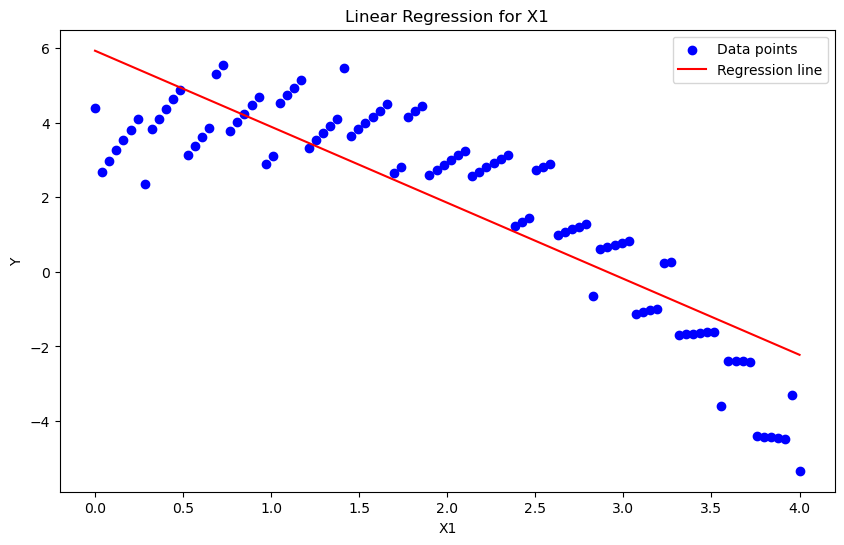

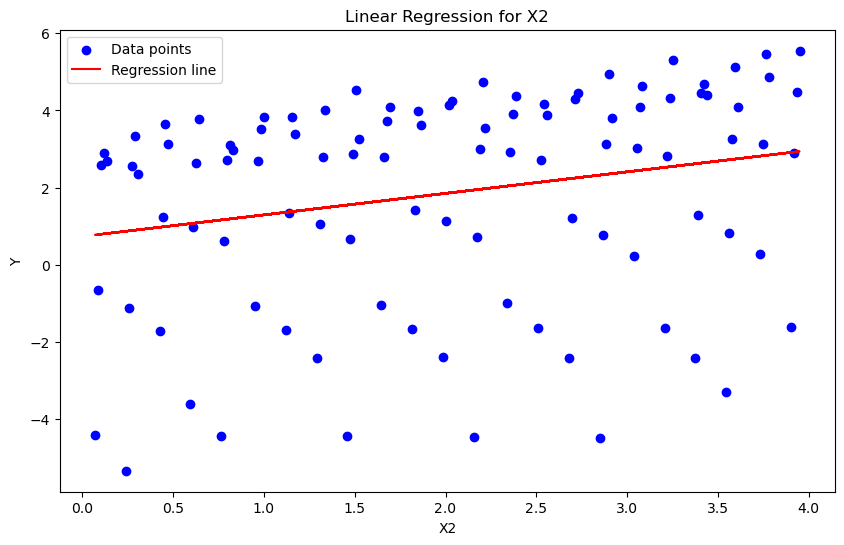

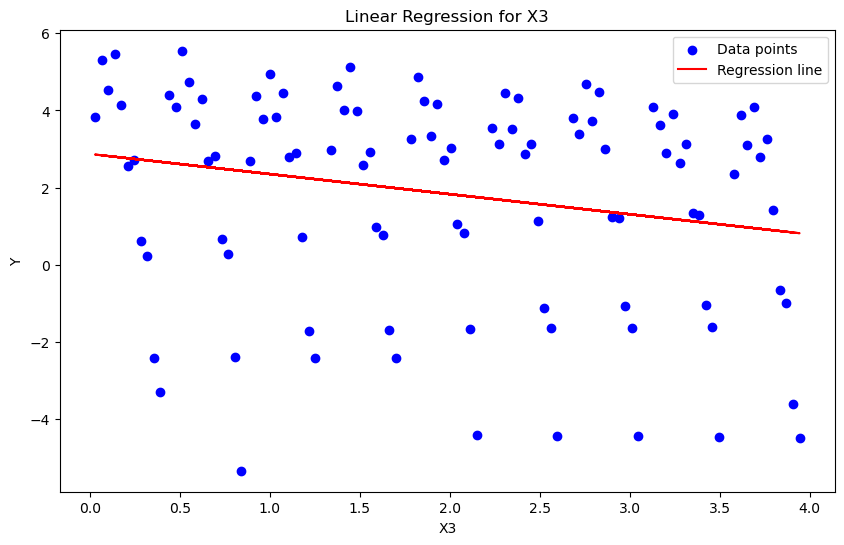

X1 equation: Y = 5.9279 + -2.0383*X1
X2 equation: Y = 0.7361 + 0.5576*X2
X3 equation: Y = 2.8714 + -0.5205*X3
Combined equation: Y = 5.9279 + -2.0383X1 + 0.5576X2 + -0.5205X3


In [6]:
import matplotlib.pyplot as plt

# Function to plot single feature regression
def plot_single_feature(X, y, theta, feature_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, np.dot(np.c_[np.ones((len(X), 1)), X], theta), color='red', label='Regression line')
    plt.xlabel(feature_name)
    plt.ylabel('Y')
    plt.legend()
    plt.title(f'Linear Regression for {feature_name}')
    plt.show()

# Plot for X1
plot_single_feature(X1, y, theta1, 'X1')

# Plot for X2
plot_single_feature(X2, y, theta2, 'X2')

# Plot for X3
plot_single_feature(X3, y, theta3, 'X3')

# Print the equations
print(f"X1 equation: Y = {theta1[0]:.4f} + {theta1[1]:.4f}*X1")
print(f"X2 equation: Y = {theta2[0]:.4f} + {theta2[1]:.4f}*X2")
print(f"X3 equation: Y = {theta3[0]:.4f} + {theta3[1]:.4f}*X3")
print(f"Combined equation: Y = {theta_combined[0]:.4f} + {theta_combined[1]:.4f}X1 + {theta_combined[2]:.4f}X2 + {theta_combined[3]:.4f}X3")

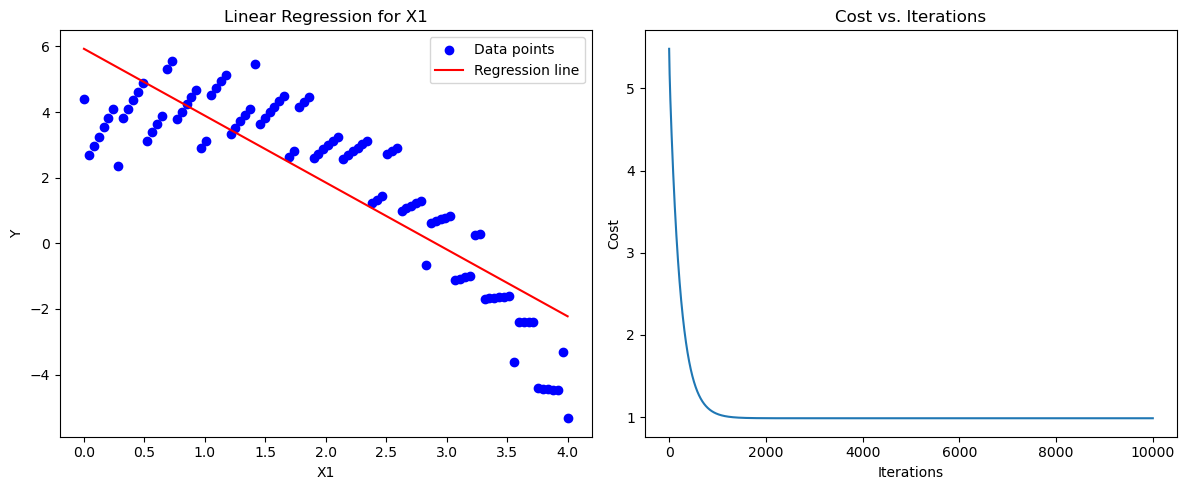

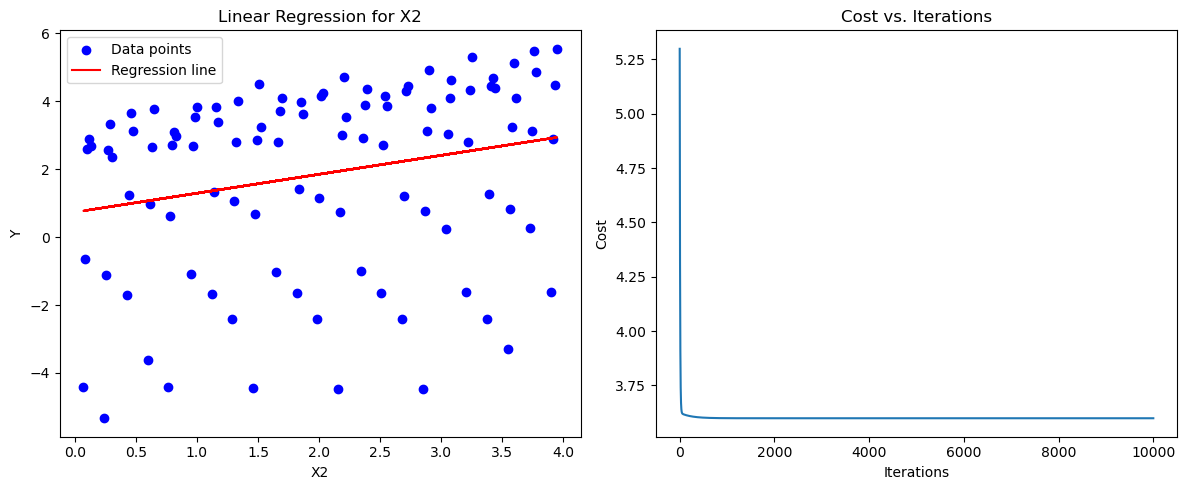

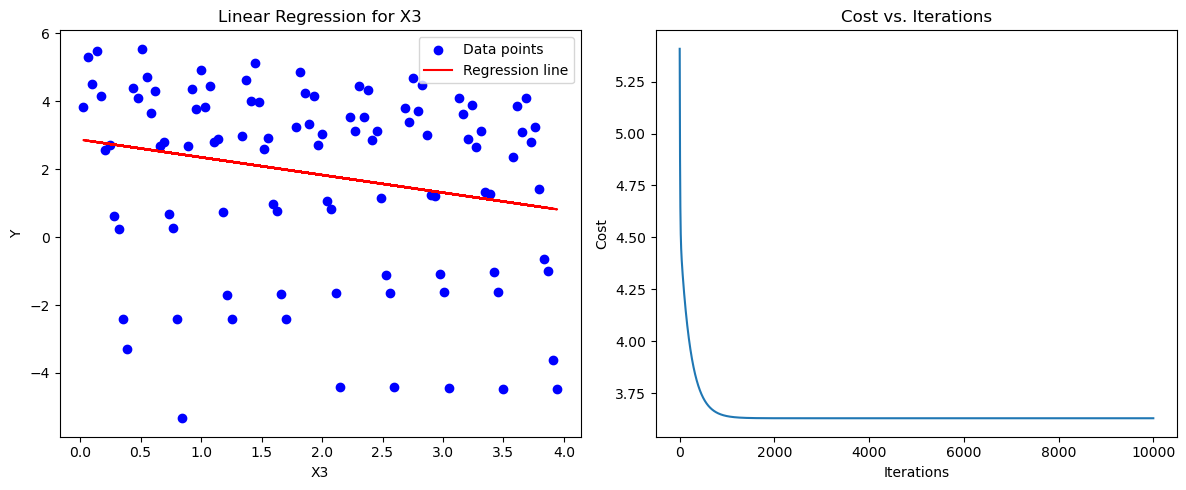

Predictions: [ 3.92673701 -0.23065589  0.40767135]

Linear Models:
X1: Y = 5.9279 + -2.0383 * X1
X2: Y = 0.7361 + 0.5576 * X2
X3: Y = 2.8714 + -0.5205 * X3

The explanatory variable with the lowest loss is: X1

Impact of Learning Rate:
With a learning rate of 0.01 and 10000 iterations:
X1: Final loss = 0.9850
X2: Final loss = 3.5994
X3: Final loss = 3.6295
A higher learning rate generally leads to faster convergence but risks overshooting the minimum.
A lower learning rate provides more precise results but may require more iterations to converge.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("assets/D3.csv")
X = data[['X1', 'X2', 'X3']].values
y = data['Y'].values

def hypothesis(X, theta):
    return np.dot(X, theta)

def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for _ in range(iterations):
        predictions = hypothesis(X, theta)
        theta = theta - (learning_rate / m) * np.dot(X.T, (predictions - y))
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

def plot_results(X, y, theta, cost_history, variable_name):
    plt.figure(figsize=(12, 5))
    
    # Plot the regression line
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 1], y, color='b', label='Data points')
    plt.plot(X[:, 1], hypothesis(X, theta), color='r', label='Regression line')
    plt.xlabel(variable_name)
    plt.ylabel('Y')
    plt.title(f'Linear Regression for {variable_name}')
    plt.legend()
    
    # Plot the cost history
    plt.subplot(1, 2, 2)
    plt.plot(cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs. Iterations')
    
    plt.tight_layout()
    plt.show()

learning_rate = 0.01
num_iterations = 10000

# Train on X1
X1 = X[:, 0].reshape(-1, 1)
X1_b = np.c_[np.ones((len(X1), 1)), X1]
theta1 = np.zeros(2)
theta1, cost_history1 = gradient_descent(X1_b, y, theta1, learning_rate, num_iterations)
plot_results(X1_b, y, theta1, cost_history1, 'X1')

# Train on X2
X2 = X[:, 1].reshape(-1, 1)
X2_b = np.c_[np.ones((len(X2), 1)), X2]
theta2 = np.zeros(2)
theta2, cost_history2 = gradient_descent(X2_b, y, theta2, learning_rate, num_iterations)
plot_results(X2_b, y, theta2, cost_history2, 'X2')

# Train on X3
X3 = X[:, 2].reshape(-1, 1)
X3_b = np.c_[np.ones((len(X3), 1)), X3]
theta3 = np.zeros(2)
theta3, cost_history3 = gradient_descent(X3_b, y, theta3, learning_rate, num_iterations)
plot_results(X3_b, y, theta3, cost_history3, 'X3')

# Combine thetas
theta_combined = np.array([theta1[0], theta1[1], theta2[1], theta3[1]])

# Function for predictions
def predictions(X, theta):
    return np.dot(X, theta)

# Now you can predict using all features
new_X = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_X_b = np.c_[np.ones((len(new_X), 1)), new_X]
predictions = predictions(new_X_b, theta_combined)
print("Predictions:", predictions)

# Report the linear models
print("\nLinear Models:")
print(f"X1: Y = {theta1[0]:.4f} + {theta1[1]:.4f} * X1")
print(f"X2: Y = {theta2[0]:.4f} + {theta2[1]:.4f} * X2")
print(f"X3: Y = {theta3[0]:.4f} + {theta3[1]:.4f} * X3")

# Find the variable with the lowest loss
final_costs = [cost_history1[-1], cost_history2[-1], cost_history3[-1]]
best_var_index = np.argmin(final_costs)
best_var = ['X1', 'X2', 'X3'][best_var_index]
print(f"\nThe explanatory variable with the lowest loss is: {best_var}")

# Describe the impact of learning rate
print("\nImpact of Learning Rate:")
print(f"With a learning rate of {learning_rate} and {num_iterations} iterations:")
for i, var in enumerate(['X1', 'X2', 'X3']):
    print(f"{var}: Final loss = {final_costs[i]:.4f}")
print("A higher learning rate generally leads to faster convergence but risks overshooting the minimum.")
print("A lower learning rate provides more precise results but may require more iterations to converge.")

Best learning rate: 0.1
Final linear model:
Y = 5.3139 + -2.0037*X1 + 0.5326*X2 + -0.2656*X3


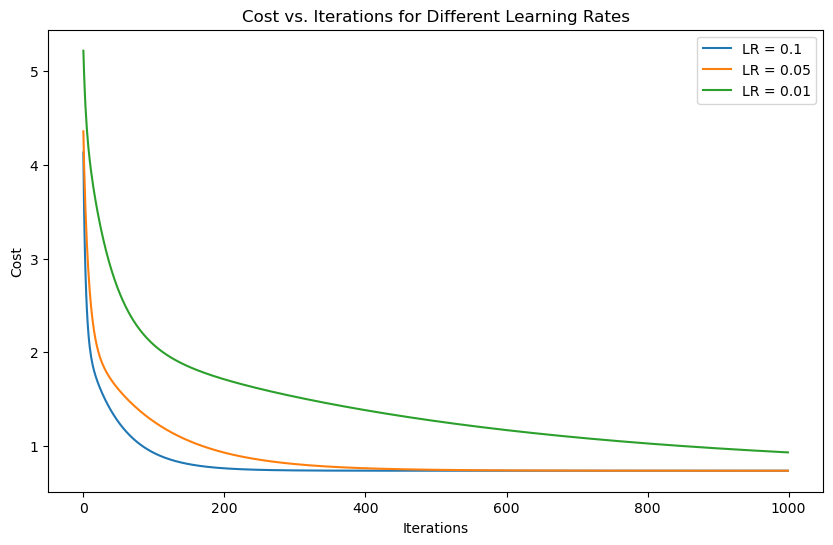


Impact of different learning rates:
Learning rate 0.1:
  Final cost: 0.7385
  Convergence speed: Fast
Learning rate 0.05:
  Final cost: 0.7385
  Convergence speed: Medium
Learning rate 0.01:
  Final cost: 0.9338
  Convergence speed: Slow

Predictions for new values:
(X1, X2, X3) = (1, 1, 1): Predicted Y = 3.5773
(X1, X2, X3) = (2, 0, 4): Predicted Y = 0.2443
(X1, X2, X3) = (3, 2, 1): Predicted Y = 0.1025


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("assets/D3.csv")
X = data[['X1', 'X2', 'X3']].values
y = data['Y'].values
n = len(X)
# Add bias term to X
X_b = np.c_[np.ones((n, 1)), X]

def hypothesis(X, theta):
    return np.dot(X, theta)

def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    
    for _ in range(iterations):
        predictions = hypothesis(X, theta)
        theta = theta - (learning_rate / m) * np.dot(X.T, (predictions - y))
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

# Explore different learning rates
learning_rates = [0.1, 0.05, 0.01]
iterations = 1000
results = {}

for lr in learning_rates:
    theta = np.zeros(X_b.shape[1])
    final_theta, cost_history = gradient_descent(X_b, y, theta, lr, iterations)
    results[lr] = {
        "theta": final_theta,
        "cost_history": cost_history,
        "final_cost": cost_history[-1]
    }

# Find the best model (lowest final cost)
best_lr = min(results, key=lambda x: results[x]['final_cost'])
best_theta = results[best_lr]['theta']

# Report the final linear model
print(f"Best learning rate: {best_lr}")
print("Final linear model:")
print(f"Y = {best_theta[0]:.4f} + {best_theta[1]:.4f}*X1 + {best_theta[2]:.4f}*X2 + {best_theta[3]:.4f}*X3")

# Plot loss over iteration for each learning rate
plt.figure(figsize=(10, 6))
for lr, result in results.items():
    plt.plot(result['cost_history'], label=f'LR = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations for Different Learning Rates')
plt.legend()
plt.show()

# Describe the impact of different learning rates
print("\nImpact of different learning rates:")
for lr, result in results.items():
    print(f"Learning rate {lr}:")
    print(f"  Final cost: {result['final_cost']:.4f}")
    print(f"  Convergence speed: {'Fast' if lr == 0.1 else 'Medium' if lr == 0.05 else 'Slow'}")

# Predict for new values
new_X = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_X_b = np.c_[np.ones((len(new_X), 1)), new_X]
predictions = hypothesis(new_X_b, best_theta)

print("\nPredictions for new values:")
for i, (x1, x2, x3) in enumerate(new_X):
    print(f"(X1, X2, X3) = ({x1}, {x2}, {x3}): Predicted Y = {predictions[i]:.4f}")

Predictions: [3.57728282 0.24429082 0.10251123]
Model parameters:
m (coefficients): [-2.00368658  0.53260157 -0.26556795]
b (intercept): 5.313935769531636
Final loss: 0.7384642444783825


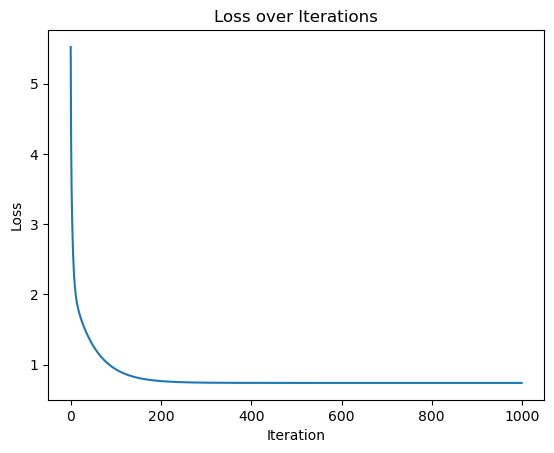

In [9]:
import numpy as np
import pandas as pd

class LinearRegression:
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.m = None
        self.b = None
        self.loss_history = [] # Initialize loss_history here

    def forward(self, X):
        return np.dot(X, self.m) + self.b

    def loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2) / 2

    def gradients(self, X, y_true, y_pred):
        m_grad = -(1/len(y_true)) * np.dot(X.T, (y_true - y_pred))
        b_grad = -(1/len(y_true)) * np.sum(y_true - y_pred)
        return m_grad, b_grad

    def fit(self, X, y):
        # Initialize parameters
        self.m = np.zeros(X.shape[1])
        self.b = 0

        for _ in range(self.iterations):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute loss
            current_loss = self.loss(y, y_pred)
            self.loss_history.append(current_loss)  # Add the current loss to loss_history
            
            # Compute gradients
            m_grad, b_grad = self.gradients(X, y, y_pred)
            
            # Update parameters
            self.m -= self.learning_rate * m_grad
            self.b -= self.learning_rate * b_grad

        return self

    def predict(self, X):
        return self.forward(X)

# Read data from CSV
data = pd.read_csv('assets/D3.csv')
X = data[['X1', 'X2', 'X3']].values # Use all three input features
y = data['Y'].values

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
X_test = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]]) # Example test data with three features
predictions = model.predict(X_test)
print("Predictions:", predictions)

# Print model parameters
print("Model parameters:")
print("m (coefficients):", model.m)
print("b (intercept):", model.b)

# Print final loss
print("Final loss:", model.loss_history[-1])

# Optional: Plot the loss history
import matplotlib.pyplot as plt

plt.plot(model.loss_history)
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

NameError: name 'model' is not defined

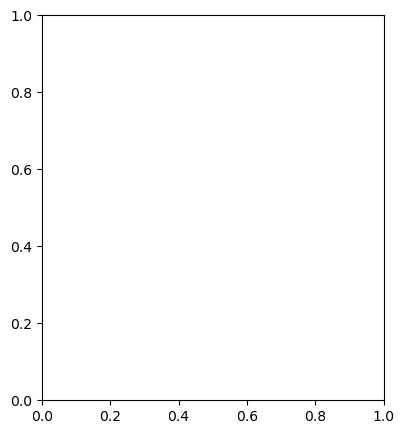

In [11]:
import matplotlib.pyplot as plt

# Plot 1: Loss over iterations
plt.subplot(131)
plt.plot(model.loss_history)
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')

# Plot 2: Actual vs Predicted
plt.subplot(132)
y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot 3: 3D scatter plot (using first two features)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(133, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', label='Actual')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()
plt.title('3D Scatter Plot (X1, X2, Y)')

plt.tight_layout()
plt.show()

# Feature importance
feature_importance = np.abs(model.m)
feature_importance = 100 * (feature_importance / np.sum(feature_importance))
features = ['X1', 'X2', 'X3']

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.show()

# Pairplot
pd.plotting.scatter_matrix(data[['X1', 'X2', 'X3', 'Y']], figsize=(12, 12), diagonal='kde')
plt.tight_layout()
plt.show()
